## analyzing impact of shale length on plume migration

In [1]:
# December 2022

In [ ]:
# Looking for code to plot the corresponding SG and dP fields for this data? 
# See the analysis_new6 files.

In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt

import torch
import numpy as np
import torch.nn as nn
import torch.nn.functional as F

from analysis_new_utils import *
import copy

# SHALE LENGTH CASE
# =============================================

In [2]:
# load data as .npy

with open('analysis_new5_shalelen_data.npy', 'rb') as f:
    indepVar = np.load(f)
    plume_radii = np.load(f)
    sweep_effs = np.load(f)
    plume_vols = np.load(f)
    leaked_vols = np.load(f)
    max_buildup = np.load(f)
    x_in = np.load(f)
    sg = np.load(f)
    dp = np.load(f)

In [3]:
indepVars = np.linspace(np.min(indepVar), np.max(indepVar), 6)

def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

n = np.zeros((len(indepVars)), int)

for i, var in enumerate(indepVars):
    n[i] = find_nearest(indepVar, var).astype(int)

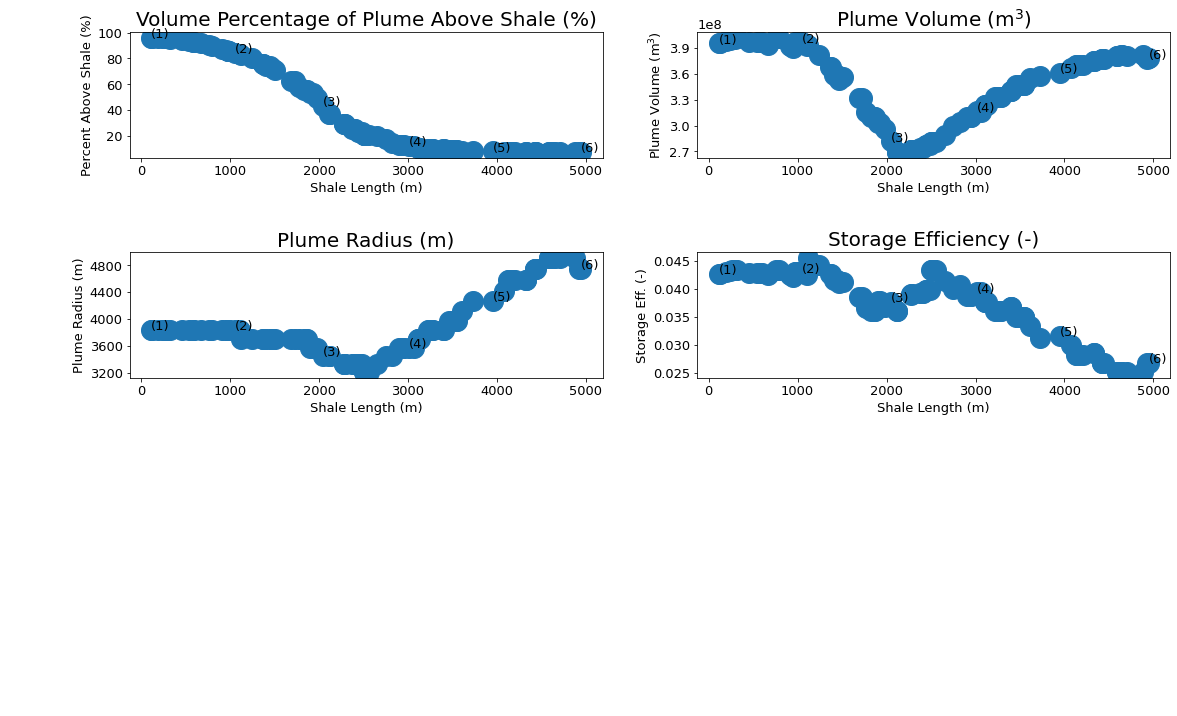

In [17]:
fig = plt.figure(figsize=(17, 10))
plt.rcParams.update({'font.size':13})

subfigs = fig.subfigures(2, 1, wspace=0.01, hspace=1, height_ratios=[1.5, 1])

# -------------------------------- PLOTTING ANALYSIS GRAPHS --------------------------------
def r2(y, y_pred):
    y_avg = np.mean(y)
    
    SST = 0
    SSReg = 0
    
    for i in range(len(y)):
        SST += (y[i] - y_avg) ** 2
        SSReg += (y_pred[i] - y_avg) ** 2
    
    return SSReg/SST

def plotAnalysis(axsObj, x, y, xlabel, ylabel, title):
    axsObj.set_xlabel(xlabel)
    axsObj.set_ylabel(ylabel)
    axsObj.set_title(title, fontsize=20)
    axsObj.scatter(x, np.array(y), s=400)
    
    axsObj.yaxis.set_major_locator(plt.MaxNLocator(5)) # constrain to ≤5 y ticks
        
    axsObj.annotate('(1)', xy=(x[n[0]], y[n[0]]))
    axsObj.annotate('(2)', xy=(x[n[1]], y[n[1]]))
    axsObj.annotate('(3)', xy=(x[n[2]], y[n[2]]))
    axsObj.annotate('(4)', xy=(x[n[3]], y[n[3]]))
    axsObj.annotate('(5)', xy=(x[n[4]], y[n[4]]))
    axsObj.annotate('(6)', xy=(x[n[5]], y[n[5]]))

axs0 = subfigs[0].subplots(2, 2)
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.95, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.75)

splitIdx = indepVar[np.argmin(plume_vols)]
plotAnalysis(axs0[0, 0], indepVar, leaked_vols / plume_vols * 100, 'Shale Length (m)', 'Percent Above Shale (%)', 'Volume Percentage of Plume Above Shale (%)')
plotAnalysis(axs0[0, 1], indepVar, plume_vols, 'Shale Length (m)', 'Plume Volume (m$^3$)', 'Plume Volume (m$^3$)')
plotAnalysis(axs0[1, 0], indepVar, plume_radii, 'Shale Length (m)', 'Plume Radius (m)', 'Plume Radius (m)')
plotAnalysis(axs0[1, 1], indepVar, sweep_effs, 'Shale Length (m)', 'Storage Eff. (-)', 'Storage Efficiency (-)')

# plt.tight_layout()
plt.savefig('analysis_new7_shalelen.png', dpi=300)
plt.show()


# Yes, these points seem ginormous. But when we save figure with dpi=300, they shrink to regular size.

# SHALE PERM CASE
# =============================================

In [19]:
# load .npy data

with open('analysis_new5_shaleperm_data.npy', 'rb') as f:
    indepVar = np.load(f)
    plume_radii = np.load(f)
    sweep_effs = np.load(f)
    plume_vols = np.load(f)
    leaked_vols = np.load(f)
    max_buildup = np.load(f)
    x_in = np.load(f)
    sg = np.load(f)
    dp = np.load(f)

In [20]:
indepVars = np.linspace(np.min(indepVar), np.max(indepVar), 6)

def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

n = np.zeros((len(indepVars)), int)

for i, var in enumerate(indepVars):
    n[i] = find_nearest(indepVar, var).astype(int)

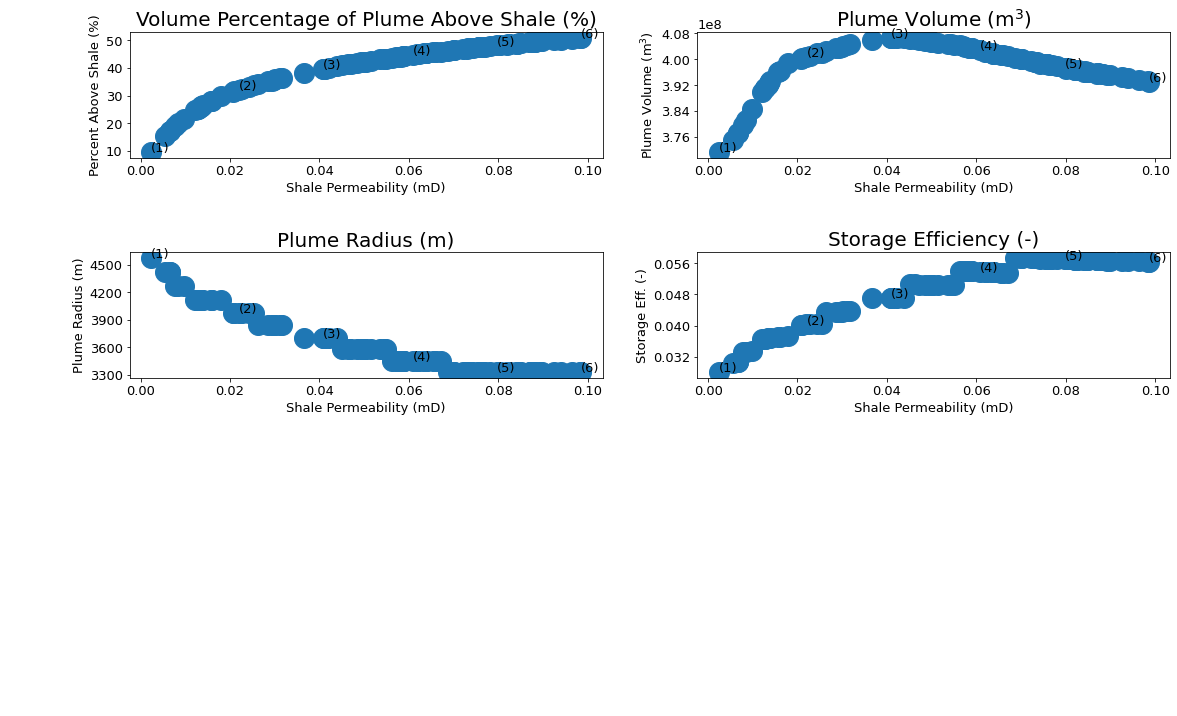

In [21]:
fig = plt.figure(figsize=(17, 10))
plt.rcParams.update({'font.size':13})

subfigs = fig.subfigures(2, 1, wspace=0.01, hspace=1, height_ratios=[1.5, 1])

# -------------------------------- PLOTTING ANALYSIS GRAPHS --------------------------------
def r2(y, y_pred):
    y_avg = np.mean(y)
    
    SST = 0
    SSReg = 0
    
    for i in range(len(y)):
        SST += (y[i] - y_avg) ** 2
        SSReg += (y_pred[i] - y_avg) ** 2
    
    return SSReg/SST

def plotAnalysis(axsObj, x, y, xlabel, ylabel, title):
    axsObj.set_xlabel(xlabel)
    axsObj.set_ylabel(ylabel)
    axsObj.set_title(title, fontsize=20)
    axsObj.scatter(x, np.array(y), s=400)
    
    axsObj.yaxis.set_major_locator(plt.MaxNLocator(5)) # constrain to ≤5 y ticks
        
    axsObj.annotate('(1)', xy=(x[n[0]], y[n[0]]))
    axsObj.annotate('(2)', xy=(x[n[1]], y[n[1]]))
    axsObj.annotate('(3)', xy=(x[n[2]], y[n[2]]))
    axsObj.annotate('(4)', xy=(x[n[3]], y[n[3]]))
    axsObj.annotate('(5)', xy=(x[n[4]], y[n[4]]))
    axsObj.annotate('(6)', xy=(x[n[5]], y[n[5]]))

axs0 = subfigs[0].subplots(2, 2)
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.95, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.75)

splitIdx = indepVar[np.argmin(plume_vols)]
plotAnalysis(axs0[0, 0], indepVar, leaked_vols / plume_vols * 100, 'Shale Permeability (mD)', 'Percent Above Shale (%)', 'Volume Percentage of Plume Above Shale (%)')
plotAnalysis(axs0[0, 1], indepVar, plume_vols, 'Shale Permeability (mD)', 'Plume Volume (m$^3$)', 'Plume Volume (m$^3$)')
plotAnalysis(axs0[1, 0], indepVar, plume_radii, 'Shale Permeability (mD)', 'Plume Radius (m)', 'Plume Radius (m)')
plotAnalysis(axs0[1, 1], indepVar, sweep_effs, 'Shale Permeability (mD)', 'Storage Eff. (-)', 'Storage Efficiency (-)')

# plt.tight_layout()
plt.savefig('analysis_new7_shaleperm.png', dpi=300)
plt.show()


# Yes, these points seem ginormous. But when we save figure with dpi=300, they shrink to regular size.

# SAND PERM CASE
# =============================================

In [22]:
# load .npy data

with open('analysis_new5_sandperm_data.npy', 'rb') as f:
    indepVar = np.load(f)
    plume_radii = np.load(f)
    sweep_effs = np.load(f)
    plume_vols = np.load(f)
    leaked_vols = np.load(f)
    max_buildup = np.load(f)
    x_in = np.load(f)
    sg = np.load(f)
    dp = np.load(f)

In [23]:
indepVars = np.linspace(np.min(indepVar), np.max(indepVar), 6)

def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

n = np.zeros((len(indepVars)), int)

for i, var in enumerate(indepVars):
    n[i] = find_nearest(indepVar, var).astype(int)

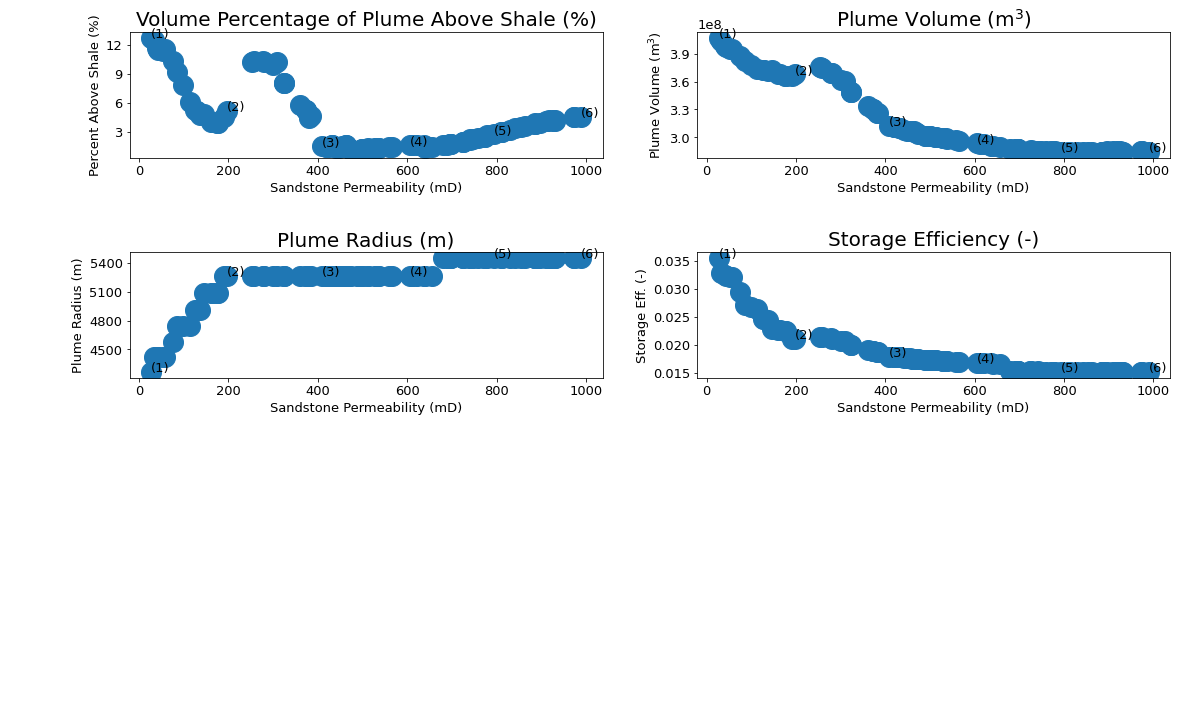

In [24]:
fig = plt.figure(figsize=(17, 10))
plt.rcParams.update({'font.size':13})

subfigs = fig.subfigures(2, 1, wspace=0.01, hspace=1, height_ratios=[1.5, 1])

# -------------------------------- PLOTTING ANALYSIS GRAPHS --------------------------------
def r2(y, y_pred):
    y_avg = np.mean(y)
    
    SST = 0
    SSReg = 0
    
    for i in range(len(y)):
        SST += (y[i] - y_avg) ** 2
        SSReg += (y_pred[i] - y_avg) ** 2
    
    return SSReg/SST

def plotAnalysis(axsObj, x, y, xlabel, ylabel, title):
    axsObj.set_xlabel(xlabel)
    axsObj.set_ylabel(ylabel)
    axsObj.set_title(title, fontsize=20)
    axsObj.scatter(x, np.array(y), s=400)
    
    axsObj.yaxis.set_major_locator(plt.MaxNLocator(5)) # constrain to ≤5 y ticks
        
    axsObj.annotate('(1)', xy=(x[n[0]], y[n[0]]))
    axsObj.annotate('(2)', xy=(x[n[1]], y[n[1]]))
    axsObj.annotate('(3)', xy=(x[n[2]], y[n[2]]))
    axsObj.annotate('(4)', xy=(x[n[3]], y[n[3]]))
    axsObj.annotate('(5)', xy=(x[n[4]], y[n[4]]))
    axsObj.annotate('(6)', xy=(x[n[5]], y[n[5]]))

axs0 = subfigs[0].subplots(2, 2)
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.95, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.75)

splitIdx = indepVar[np.argmin(plume_vols)]
plotAnalysis(axs0[0, 0], indepVar, leaked_vols / plume_vols * 100, 'Sandstone Permeability (mD)', 'Percent Above Shale (%)', 'Volume Percentage of Plume Above Shale (%)')
plotAnalysis(axs0[0, 1], indepVar, plume_vols, 'Sandstone Permeability (mD)', 'Plume Volume (m$^3$)', 'Plume Volume (m$^3$)')
plotAnalysis(axs0[1, 0], indepVar, plume_radii, 'Sandstone Permeability (mD)', 'Plume Radius (m)', 'Plume Radius (m)')
plotAnalysis(axs0[1, 1], indepVar, sweep_effs, 'Sandstone Permeability (mD)', 'Storage Eff. (-)', 'Storage Efficiency (-)')

# plt.tight_layout()
plt.savefig('analysis_new7_sandperm.png', dpi=300)
plt.show()


# Yes, these points seem ginormous. But when we save figure with dpi=300, they shrink to regular size.

# APERTURE WIDTH CASE
# =============================================

In [26]:
# load data as .npy

with open('analysis_new5_awidth_data.npy', 'rb') as f:
    indepVar = np.load(f)
    plume_radii = np.load(f)
    sweep_effs = np.load(f)
    plume_vols = np.load(f)
    leaked_vols = np.load(f)
    max_buildup = np.load(f)
    x_in = np.load(f)
    sg = np.load(f)
    dp = np.load(f)

In [27]:
indepVars = np.linspace(np.min(indepVar), np.max(indepVar), 6)

def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

n = np.zeros((len(indepVars)), int)

for i, var in enumerate(indepVars):
    n[i] = find_nearest(indepVar, var).astype(int)

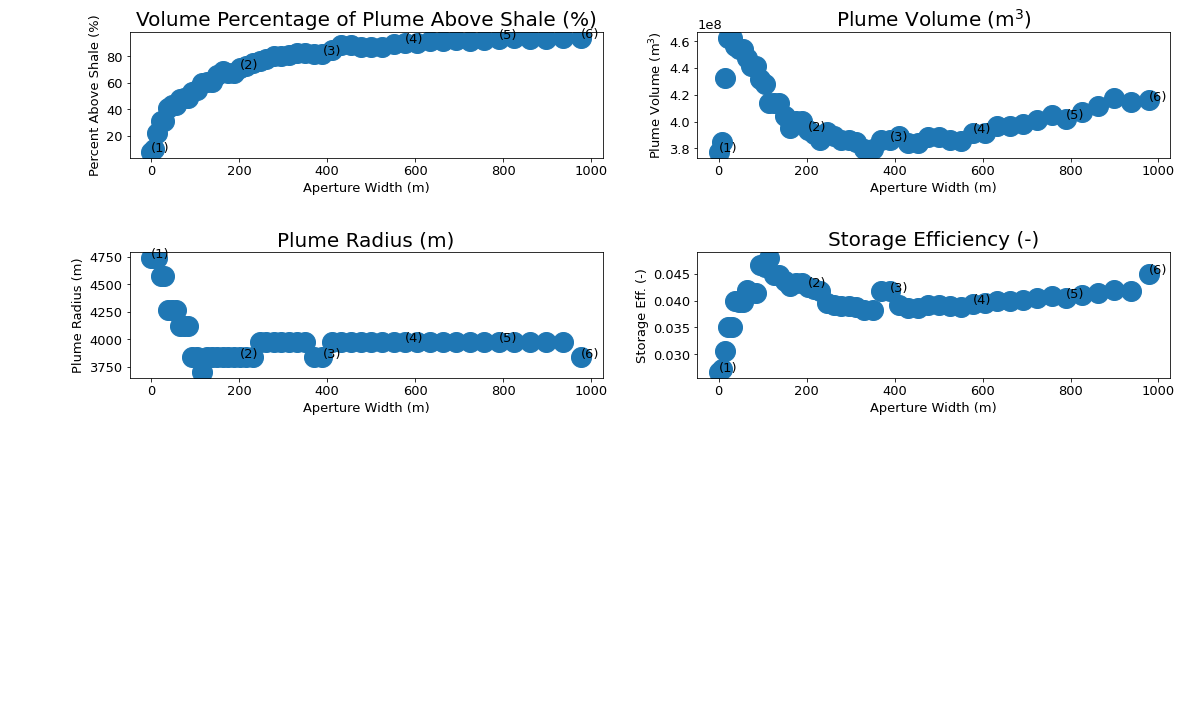

In [28]:
fig = plt.figure(figsize=(17, 10))
plt.rcParams.update({'font.size':13})

subfigs = fig.subfigures(2, 1, wspace=0.01, hspace=1, height_ratios=[1.5, 1])

# -------------------------------- PLOTTING ANALYSIS GRAPHS --------------------------------
def r2(y, y_pred):
    y_avg = np.mean(y)
    
    SST = 0
    SSReg = 0
    
    for i in range(len(y)):
        SST += (y[i] - y_avg) ** 2
        SSReg += (y_pred[i] - y_avg) ** 2
    
    return SSReg/SST

def plotAnalysis(axsObj, x, y, xlabel, ylabel, title):
    axsObj.set_xlabel(xlabel)
    axsObj.set_ylabel(ylabel)
    axsObj.set_title(title, fontsize=20)
    axsObj.scatter(x, np.array(y), s=400)
    
    axsObj.yaxis.set_major_locator(plt.MaxNLocator(5)) # constrain to ≤5 y ticks
        
    axsObj.annotate('(1)', xy=(x[n[0]], y[n[0]]))
    axsObj.annotate('(2)', xy=(x[n[1]], y[n[1]]))
    axsObj.annotate('(3)', xy=(x[n[2]], y[n[2]]))
    axsObj.annotate('(4)', xy=(x[n[3]], y[n[3]]))
    axsObj.annotate('(5)', xy=(x[n[4]], y[n[4]]))
    axsObj.annotate('(6)', xy=(x[n[5]], y[n[5]]))

axs0 = subfigs[0].subplots(2, 2)
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.95, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.75)

splitIdx = indepVar[np.argmin(plume_vols)]
plotAnalysis(axs0[0, 0], indepVar, leaked_vols / plume_vols * 100, 'Aperture Width (m)', 'Percent Above Shale (%)', 'Volume Percentage of Plume Above Shale (%)')
plotAnalysis(axs0[0, 1], indepVar, plume_vols, 'Aperture Width (m)', 'Plume Volume (m$^3$)', 'Plume Volume (m$^3$)')
plotAnalysis(axs0[1, 0], indepVar, plume_radii, 'Aperture Width (m)', 'Plume Radius (m)', 'Plume Radius (m)')
plotAnalysis(axs0[1, 1], indepVar, sweep_effs, 'Aperture Width (m)', 'Storage Eff. (-)', 'Storage Efficiency (-)')

# plt.tight_layout()
plt.savefig('analysis_new7_awidth.png', dpi=300)
plt.show()


# Yes, these points seem ginormous. But when we save figure with dpi=300, they shrink to regular size.

# APERTURE LOCATION CASE
# =============================================

In [29]:
# load data as .npy

with open('analysis_new5_aloc_data.npy', 'rb') as f:
    indepVar = np.load(f)
    plume_radii = np.load(f)
    sweep_effs = np.load(f)
    plume_vols = np.load(f)
    leaked_vols = np.load(f)
    max_buildup = np.load(f)
    x_in = np.load(f)
    sg = np.load(f)
    dp = np.load(f)

In [30]:
indepVars = np.linspace(np.min(indepVar), np.max(indepVar), 6)

def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

n = np.zeros((len(indepVars)), int)

for i, var in enumerate(indepVars):
    n[i] = find_nearest(indepVar, var).astype(int)

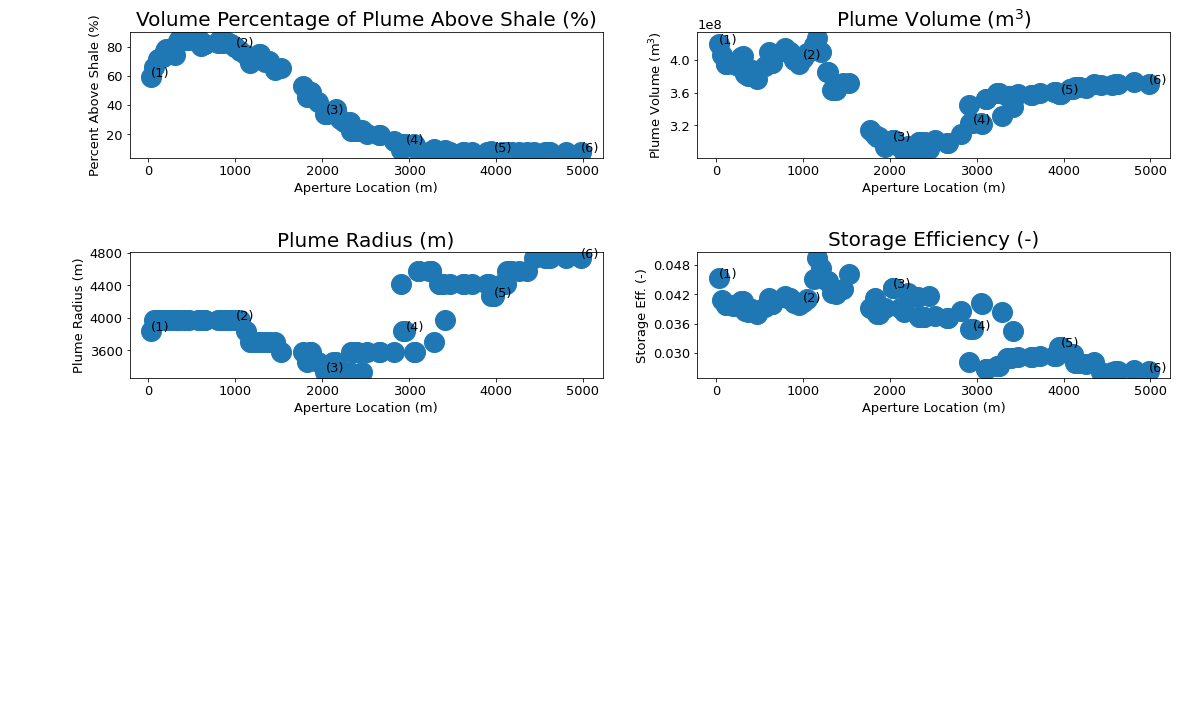

In [31]:
fig = plt.figure(figsize=(17, 10))
plt.rcParams.update({'font.size':13})

subfigs = fig.subfigures(2, 1, wspace=0.01, hspace=1, height_ratios=[1.5, 1])

# -------------------------------- PLOTTING ANALYSIS GRAPHS --------------------------------
def r2(y, y_pred):
    y_avg = np.mean(y)
    
    SST = 0
    SSReg = 0
    
    for i in range(len(y)):
        SST += (y[i] - y_avg) ** 2
        SSReg += (y_pred[i] - y_avg) ** 2
    
    return SSReg/SST

def plotAnalysis(axsObj, x, y, xlabel, ylabel, title):
    axsObj.set_xlabel(xlabel)
    axsObj.set_ylabel(ylabel)
    axsObj.set_title(title, fontsize=20)
    axsObj.scatter(x, np.array(y), s=400)
    
    axsObj.yaxis.set_major_locator(plt.MaxNLocator(5)) # constrain to ≤5 y ticks
        
    axsObj.annotate('(1)', xy=(x[n[0]], y[n[0]]))
    axsObj.annotate('(2)', xy=(x[n[1]], y[n[1]]))
    axsObj.annotate('(3)', xy=(x[n[2]], y[n[2]]))
    axsObj.annotate('(4)', xy=(x[n[3]], y[n[3]]))
    axsObj.annotate('(5)', xy=(x[n[4]], y[n[4]]))
    axsObj.annotate('(6)', xy=(x[n[5]], y[n[5]]))

axs0 = subfigs[0].subplots(2, 2)
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.95, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.75)

splitIdx = indepVar[np.argmin(plume_vols)]
plotAnalysis(axs0[0, 0], indepVar, leaked_vols / plume_vols * 100, 'Aperture Location (m)', 'Percent Above Shale (%)', 'Volume Percentage of Plume Above Shale (%)')
plotAnalysis(axs0[0, 1], indepVar, plume_vols, 'Aperture Location (m)', 'Plume Volume (m$^3$)', 'Plume Volume (m$^3$)')
plotAnalysis(axs0[1, 0], indepVar, plume_radii, 'Aperture Location (m)', 'Plume Radius (m)', 'Plume Radius (m)')
plotAnalysis(axs0[1, 1], indepVar, sweep_effs, 'Aperture Location (m)', 'Storage Eff. (-)', 'Storage Efficiency (-)')

# plt.tight_layout()
plt.savefig('analysis_new7_aloc.png', dpi=300)
plt.show()


# Yes, these points seem ginormous. But when we save figure with dpi=300, they shrink to regular size.

# dP - first 3 cases
# =============================================

In [32]:
# save data as .npy

with open('analysis_new5_shalelen_data.npy', 'rb') as f:
    indepVar_shalelen = np.load(f)
    _ = np.load(f)
    _ = np.load(f)
    _ = np.load(f)
    _ = np.load(f)
    max_buildup_shalelen = np.load(f)
    x_in_shalelen = np.load(f)
    _ = np.load(f)
    dp_shalelen = np.load(f)
    
with open('analysis_new5_shaleperm_data.npy', 'rb') as f:
    indepVar_shaleperm = np.load(f)
    _ = np.load(f)
    _ = np.load(f)
    _ = np.load(f)
    _ = np.load(f)
    max_buildup_shaleperm = np.load(f)
    x_in_shaleperm = np.load(f)
    _ = np.load(f)
    dp_shaleperm = np.load(f)
    
with open('analysis_new5_sandperm_data.npy', 'rb') as f:
    indepVar_sandperm = np.load(f)
    _ = np.load(f)
    _ = np.load(f)
    _ = np.load(f)
    _ = np.load(f)
    max_buildup_sandperm = np.load(f)
    x_in_sandperm = np.load(f)
    _ = np.load(f)
    dp_sandperm = np.load(f)

In [33]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

def nearest_arr(indepVar):
    indepVars = np.linspace(np.min(indepVar), np.max(indepVar), 3)

    n = np.zeros((len(indepVars)), int)

    for i, var in enumerate(indepVars):
        n[i] = find_nearest(indepVar, var).astype(int)
        
    return n

n_shalelen = nearest_arr(indepVar_shalelen)
n_shaleperm = nearest_arr(indepVar_shaleperm)
n_sandperm = nearest_arr(indepVar_sandperm)

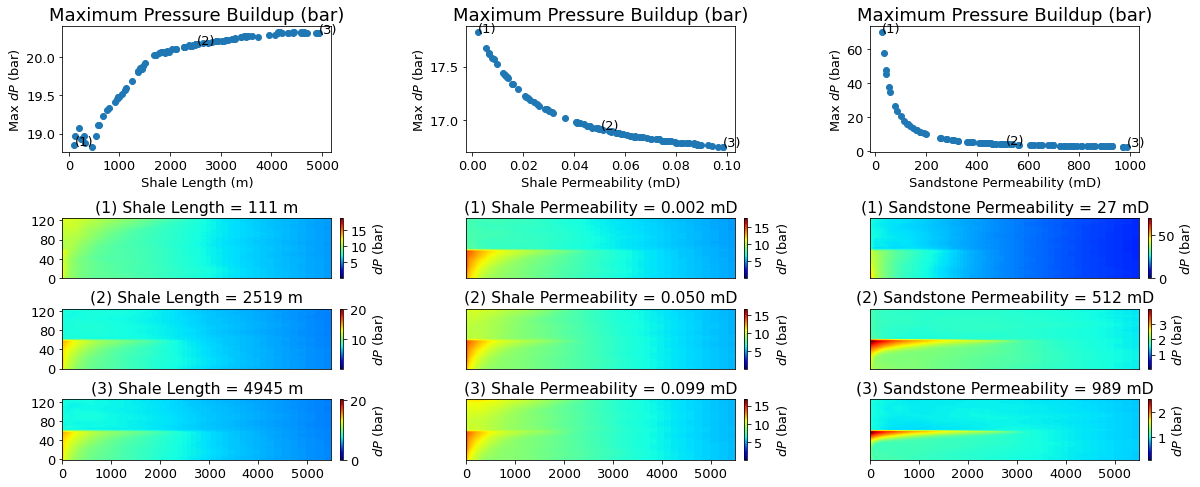

In [59]:
fig = plt.figure(figsize=(17, 7))
plt.rcParams.update({'font.size':13})

# subfigs = fig.subfigures(2, 1, wspace=0.01, hspace=1, height_ratios=[1, 2])

# -------------------------------- PLOTTING ANALYSIS GRAPHS --------------------------------
def r2(y, y_pred):
    y_avg = np.mean(y)
    
    SST = 0
    SSReg = 0
    
    for i in range(len(y)):
        SST += (y[i] - y_avg) ** 2
        SSReg += (y_pred[i] - y_avg) ** 2
    
    return SSReg/SST

def plotAnalysis(position, x, y, n_annotate, xlabel, ylabel, title):
    axsObj = fig.add_axes(position)
    
    axsObj.set_xlabel(xlabel)
    axsObj.set_ylabel(ylabel)
    axsObj.set_title(title, fontsize=18)
    axsObj.scatter(x, np.array(y))
    
    plt.jet()
        
    axsObj.annotate('(1)', xy=(x[n_annotate[0]], y[n_annotate[0]]))
    axsObj.annotate('(2)', xy=(x[n_annotate[1]], y[n_annotate[1]]))
    axsObj.annotate('(3)', xy=(x[n_annotate[2]], y[n_annotate[2]]))
#     axsObj.annotate('(4)', xy=(x[n[3]], y[n[3]]))
#     axsObj.annotate('(5)', xy=(x[n[4]], y[n[4]]))
#     axsObj.annotate('(6)', xy=(x[n[5]], y[n[5]]))

pos0 = [None] * 3
pos0[0] = [0.06, 0.65, 0.22, 0.25]
pos0[1] = [0.39, 0.65, 0.22, 0.25]
pos0[2] = [0.72, 0.65, 0.22, 0.25]

splitIdx = 225
plotAnalysis(pos0[0], indepVar_shalelen, max_buildup_shalelen, n_shalelen, 'Shale Length (m)', 'Max $dP$ (bar)', 'Maximum Pressure Buildup (bar)')
plotAnalysis(pos0[1], indepVar_shaleperm, max_buildup_shaleperm, n_shaleperm, 'Shale Permeability (mD)', 'Max $dP$ (bar)', 'Maximum Pressure Buildup (bar)')
plotAnalysis(pos0[2], indepVar_sandperm, max_buildup_sandperm, n_sandperm, 'Sandstone Permeability (mD)', 'Max $dP$ (bar)', 'Maximum Pressure Buildup (bar)')

# plt.tight_layout()

# -------------------------------- PLOTTING GAS SATURATION MAPS --------------------------------
dx = np.cumsum(3.5938*np.power(1.035012, range(200))) + 0.1
X, Y = np.meshgrid(dx, np.linspace(0,200,num = 96))

def plotField(position, type, x_in, sg, n, indepVar, xlim_on, ylim_on, cbar_on, title, rounding, units):
    axsObj = fig.add_axes(position)
    
    mask = x_in != 0
    thickness = sum(mask[:,0])
    myplot = axsObj.pcolor(X[:thickness, :200], Y[:thickness, :200], np.flipud(sg[mask].reshape((thickness, -1))), shading='auto')
    if rounding == "int":
        axsObj.set_title(f'({n}) {title} = {indepVar :.0f} {units}')
    elif rounding == "decimal":
        axsObj.set_title(f'({n}) {title} = {indepVar :.3f} {units}')
    axsObj.set_xlim(0, 5500)
    if not xlim_on:
        axsObj.set_xticks([])
    if not ylim_on:
        axsObj.set_yticks([])
    else:
        axsObj.set_yticks([0, 40, 80, 120])
    if cbar_on:
        position[0] = position[0] + 0.04
        cbaraxes = fig.add_axes(position)
        cbaraxes.set_axis_off()
        cbar0 = fig.colorbar(myplot, ax=cbaraxes)
        if type == 'SG':
            cbar0.set_label('$SG$ (-)')
        elif type == 'dP':
            cbar0.set_label('$dP$ (bar)')
#         cbar0.set_ticks([0, 0.5, 1])

plthei = 0.12
pltwid = 0.22
plth0 = 0.04
plth1 = 0.22
plth2 = 0.40
pos1 = [None] * 9
pos1[0] = [0.06, plth2, pltwid, plthei]
pos1[1] = [0.06, plth1, pltwid, plthei]
pos1[2] = [0.06, plth0, pltwid, plthei]

pos1[3] = [0.39, plth2, pltwid, plthei]
pos1[4] = [0.39, plth1, pltwid, plthei]
pos1[5] = [0.39, plth0, pltwid, plthei]

pos1[6] = [0.72, plth2, pltwid, plthei]
pos1[7] = [0.72, plth1, pltwid, plthei]
pos1[8] = [0.72, plth0, pltwid, plthei]
        
plotField(pos1[0], 'dP', x_in_shalelen[n_shalelen[0], :, :, 0, 0], dp_shalelen[n_shalelen[0], :, :, -1], 1, indepVar_shalelen[n_shalelen[0]], False, True, True, 'Shale Length', 'int', 'm')
plotField(pos1[1], 'dP', x_in_shalelen[n_shalelen[1], :, :, 0, 0], dp_shalelen[n_shalelen[1], :, :, -1], 2, indepVar_shalelen[n_shalelen[1]], False, True, True, 'Shale Length', 'int', 'm')
plotField(pos1[2], 'dP', x_in_shalelen[n_shalelen[2], :, :, 0, 0], dp_shalelen[n_shalelen[2], :, :, -1], 3, indepVar_shalelen[n_shalelen[2]], True, True, True, 'Shale Length', 'int', 'm')

plotField(pos1[3], 'dP', x_in_shaleperm[n_shaleperm[0], :, :, 0, 0], dp_shaleperm[n_shaleperm[0], :, :, -1], 1, indepVar_shaleperm[n_shaleperm[0]], False, False, True, 'Shale Permeability', 'decimal', 'mD')
plotField(pos1[4], 'dP', x_in_shaleperm[n_shaleperm[1], :, :, 0, 0], dp_shaleperm[n_shaleperm[1], :, :, -1], 2, indepVar_shaleperm[n_shaleperm[1]], False, False, True, 'Shale Permeability', 'decimal', 'mD')
plotField(pos1[5], 'dP', x_in_shaleperm[n_shaleperm[2], :, :, 0, 0], dp_shaleperm[n_shaleperm[2], :, :, -1], 3, indepVar_shaleperm[n_shaleperm[2]], True, False, True, 'Shale Permeability', 'decimal', 'mD')

plotField(pos1[6], 'dP', x_in_sandperm[n_sandperm[0], :, :, 0, 0], dp_sandperm[n_sandperm[0], :, :, -1], 1, indepVar_sandperm[n_sandperm[0]], False, False, True, 'Sandstone Permeability', 'int', 'mD')
plotField(pos1[7], 'dP', x_in_sandperm[n_sandperm[1], :, :, 0, 0], dp_sandperm[n_sandperm[1], :, :, -1], 2, indepVar_sandperm[n_sandperm[1]], False, False, True, 'Sandstone Permeability', 'int', 'mD')
plotField(pos1[8], 'dP', x_in_sandperm[n_sandperm[2], :, :, 0, 0], dp_sandperm[n_sandperm[2], :, :, -1], 3, indepVar_sandperm[n_sandperm[2]], True, False, True, 'Sandstone Permeability', 'int', 'mD')

plt.savefig('analysis_new7_dP1.png', dpi=300)
plt.show()

# dP - last 2 cases
# =============================================

In [61]:
# save data as .npy

with open('analysis_new5_awidth_data.npy', 'rb') as f:
    indepVar_awidth = np.load(f)
    _ = np.load(f)
    _ = np.load(f)
    _ = np.load(f)
    _ = np.load(f)
    max_buildup_awidth = np.load(f)
    x_in_awidth = np.load(f)
    _ = np.load(f)
    dp_awidth = np.load(f)
    
with open('analysis_new5_aloc_data.npy', 'rb') as f:
    indepVar_aloc = np.load(f)
    _ = np.load(f)
    _ = np.load(f)
    _ = np.load(f)
    _ = np.load(f)
    max_buildup_aloc = np.load(f)
    x_in_aloc = np.load(f)
    _ = np.load(f)
    dp_aloc = np.load(f)

In [62]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

def nearest_arr(indepVar):
    indepVars = np.linspace(np.min(indepVar), np.max(indepVar), 3)

    n = np.zeros((len(indepVars)), int)

    for i, var in enumerate(indepVars):
        n[i] = find_nearest(indepVar, var).astype(int)
        
    return n

n_awidth = nearest_arr(indepVar_awidth)
n_aloc = nearest_arr(indepVar_aloc)

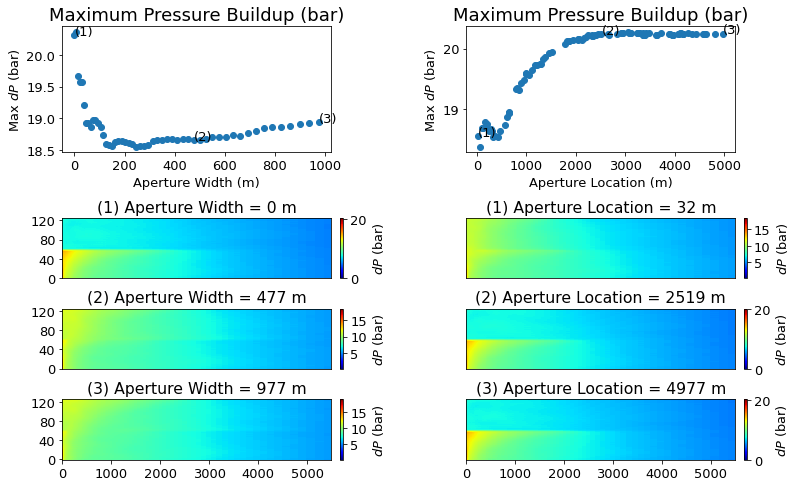

In [63]:
fig = plt.figure(figsize=(17, 7))
plt.rcParams.update({'font.size':13})

# subfigs = fig.subfigures(2, 1, wspace=0.01, hspace=1, height_ratios=[1, 2])

# -------------------------------- PLOTTING ANALYSIS GRAPHS --------------------------------
def r2(y, y_pred):
    y_avg = np.mean(y)
    
    SST = 0
    SSReg = 0
    
    for i in range(len(y)):
        SST += (y[i] - y_avg) ** 2
        SSReg += (y_pred[i] - y_avg) ** 2
    
    return SSReg/SST

def plotAnalysis(position, x, y, n_annotate, xlabel, ylabel, title):
    axsObj = fig.add_axes(position)
    
    axsObj.set_xlabel(xlabel)
    axsObj.set_ylabel(ylabel)
    axsObj.set_title(title, fontsize=18)
    axsObj.scatter(x, np.array(y))
    
    plt.jet()
        
    axsObj.annotate('(1)', xy=(x[n_annotate[0]], y[n_annotate[0]]))
    axsObj.annotate('(2)', xy=(x[n_annotate[1]], y[n_annotate[1]]))
    axsObj.annotate('(3)', xy=(x[n_annotate[2]], y[n_annotate[2]]))
#     axsObj.annotate('(4)', xy=(x[n[3]], y[n[3]]))
#     axsObj.annotate('(5)', xy=(x[n[4]], y[n[4]]))
#     axsObj.annotate('(6)', xy=(x[n[5]], y[n[5]]))

pos0 = [None] * 3
pos0[0] = [0.06, 0.65, 0.22, 0.25]
pos0[1] = [0.39, 0.65, 0.22, 0.25]
pos0[2] = [0.72, 0.65, 0.22, 0.25]

splitIdx = 225
plotAnalysis(pos0[0], indepVar_awidth, max_buildup_awidth, n_awidth, 'Aperture Width (m)', 'Max $dP$ (bar)', 'Maximum Pressure Buildup (bar)')
plotAnalysis(pos0[1], indepVar_aloc, max_buildup_aloc, n_aloc, 'Aperture Location (m)', 'Max $dP$ (bar)', 'Maximum Pressure Buildup (bar)')

# plt.tight_layout()

# -------------------------------- PLOTTING GAS SATURATION MAPS --------------------------------
dx = np.cumsum(3.5938*np.power(1.035012, range(200))) + 0.1
X, Y = np.meshgrid(dx, np.linspace(0,200,num = 96))

def plotField(position, type, x_in, sg, n, indepVar, xlim_on, ylim_on, cbar_on, title, rounding, units):
    axsObj = fig.add_axes(position)
    
    mask = x_in != 0
    thickness = sum(mask[:,0])
    myplot = axsObj.pcolor(X[:thickness, :200], Y[:thickness, :200], np.flipud(sg[mask].reshape((thickness, -1))), shading='auto')
    if rounding == "int":
        axsObj.set_title(f'({n}) {title} = {indepVar :.0f} {units}')
    elif rounding == "decimal":
        axsObj.set_title(f'({n}) {title} = {indepVar :.3f} {units}')
    axsObj.set_xlim(0, 5500)
    if not xlim_on:
        axsObj.set_xticks([])
    if not ylim_on:
        axsObj.set_yticks([])
    else:
        axsObj.set_yticks([0, 40, 80, 120])
    if cbar_on:
        position[0] = position[0] + 0.04
        cbaraxes = fig.add_axes(position)
        cbaraxes.set_axis_off()
        cbar0 = fig.colorbar(myplot, ax=cbaraxes)
        if type == 'SG':
            cbar0.set_label('$SG$ (-)')
        elif type == 'dP':
            cbar0.set_label('$dP$ (bar)')
#         cbar0.set_ticks([0, 0.5, 1])

plthei = 0.12
pltwid = 0.22
plth0 = 0.04
plth1 = 0.22
plth2 = 0.40
pos1 = [None] * 9
pos1[0] = [0.06, plth2, pltwid, plthei]
pos1[1] = [0.06, plth1, pltwid, plthei]
pos1[2] = [0.06, plth0, pltwid, plthei]

pos1[3] = [0.39, plth2, pltwid, plthei]
pos1[4] = [0.39, plth1, pltwid, plthei]
pos1[5] = [0.39, plth0, pltwid, plthei]

pos1[6] = [0.72, plth2, pltwid, plthei]
pos1[7] = [0.72, plth1, pltwid, plthei]
pos1[8] = [0.72, plth0, pltwid, plthei]
        
plotField(pos1[0], 'dP', x_in_awidth[n_awidth[0], :, :, 0, 0], dp_awidth[n_awidth[0], :, :, -1], 1, indepVar_awidth[n_awidth[0]], False, True, True, 'Aperture Width', 'int', 'm')
plotField(pos1[1], 'dP', x_in_awidth[n_awidth[1], :, :, 0, 0], dp_awidth[n_awidth[1], :, :, -1], 2, indepVar_awidth[n_awidth[1]], False, True, True, 'Aperture Width', 'int', 'm')
plotField(pos1[2], 'dP', x_in_awidth[n_awidth[2], :, :, 0, 0], dp_awidth[n_awidth[2], :, :, -1], 3, indepVar_awidth[n_awidth[2]], True, True, True, 'Aperture Width', 'int', 'm')

plotField(pos1[3], 'dP', x_in_aloc[n_aloc[0], :, :, 0, 0], dp_aloc[n_aloc[0], :, :, -1], 1, indepVar_aloc[n_aloc[0]], False, False, True, 'Aperture Location', 'int', 'm')
plotField(pos1[4], 'dP', x_in_aloc[n_aloc[1], :, :, 0, 0], dp_aloc[n_aloc[1], :, :, -1], 2, indepVar_aloc[n_aloc[1]], False, False, True, 'Aperture Location', 'int', 'm')
plotField(pos1[5], 'dP', x_in_aloc[n_aloc[2], :, :, 0, 0], dp_aloc[n_aloc[2], :, :, -1], 3, indepVar_aloc[n_aloc[2]], True, False, True, 'Aperture Location', 'int', 'm')

plt.savefig('analysis_new7_dP2.png', dpi=300)
plt.show()